Warning message:
"package 'lattice' was built under R version 4.1.3"


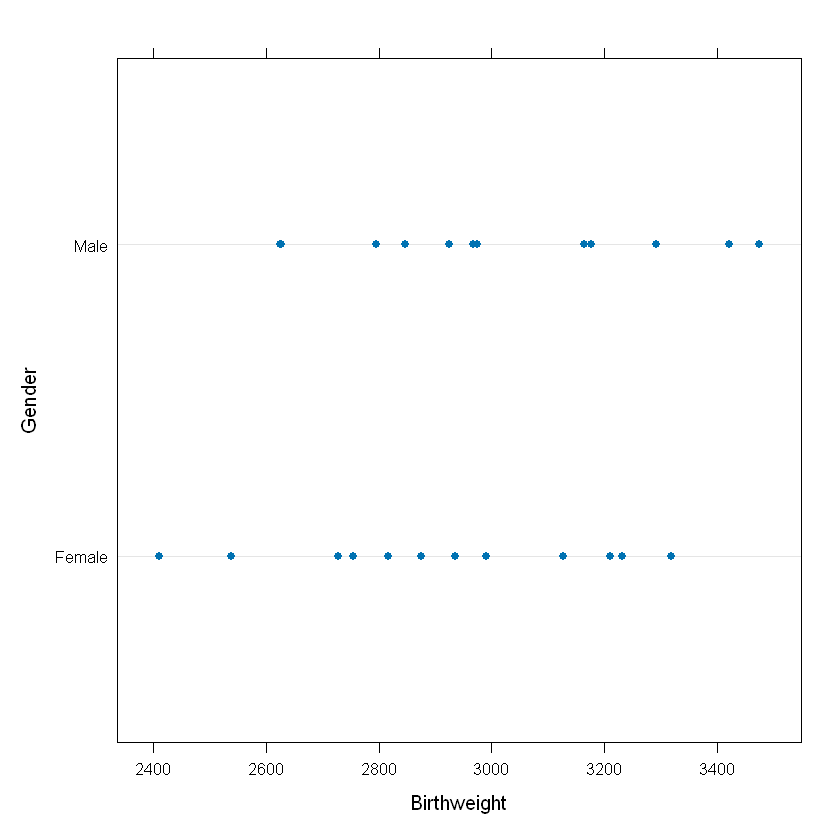

In [3]:
library(LearnBayes)
data("birthweight")
library(lattice)
mygender <- with(birthweight, ifelse(birthweight$gender==0,"Male","Female"))
dotplot(mygender ~ weight, data = birthweight, xlab = "Birthweight", ylab = "Gender")

### Apply JAGS

In [1]:
# Sys.setenv(JAGS_HOME="C:/Program Files/JAGS/JAGS-4.3.0")
library(rjags)

Warning message:
"package 'rjags' was built under R version 4.1.3"
Loading required package: coda

Warning message:
"package 'coda' was built under R version 4.1.3"
Linked to JAGS 4.3.0

Loaded modules: basemod,bugs



In [4]:
n = 35 # sample size
y = 31 # number of successes
model_string <- "model{

  # Likelihood
  y ~ dbinom(theta, n)

  # Prior
  theta ~ dbeta(alpha, beta)
  alpha <- 3 # prior successes
  beta <- 1 # prior failures

}"
dataList = list(y = y, n = n)

model <- jags.model(file = textConnection(model_string), 
                    data = dataList)
update(model, n.iter = 1000)

Nrep = 10000 # number of values to simulate

posterior_sample <- coda.samples(model,
                       variable.names = c("theta"),
                       n.iter = Nrep)
summary(posterior_sample)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 1
   Unobserved stochastic nodes: 1
   Total graph size: 5

Initializing model




Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

          Mean             SD       Naive SE Time-series SE 
      0.872354       0.052399       0.000524       0.000726 

2. Quantiles for each variable:

  2.5%    25%    50%    75%  97.5% 
0.7516 0.8405 0.8788 0.9108 0.9548 


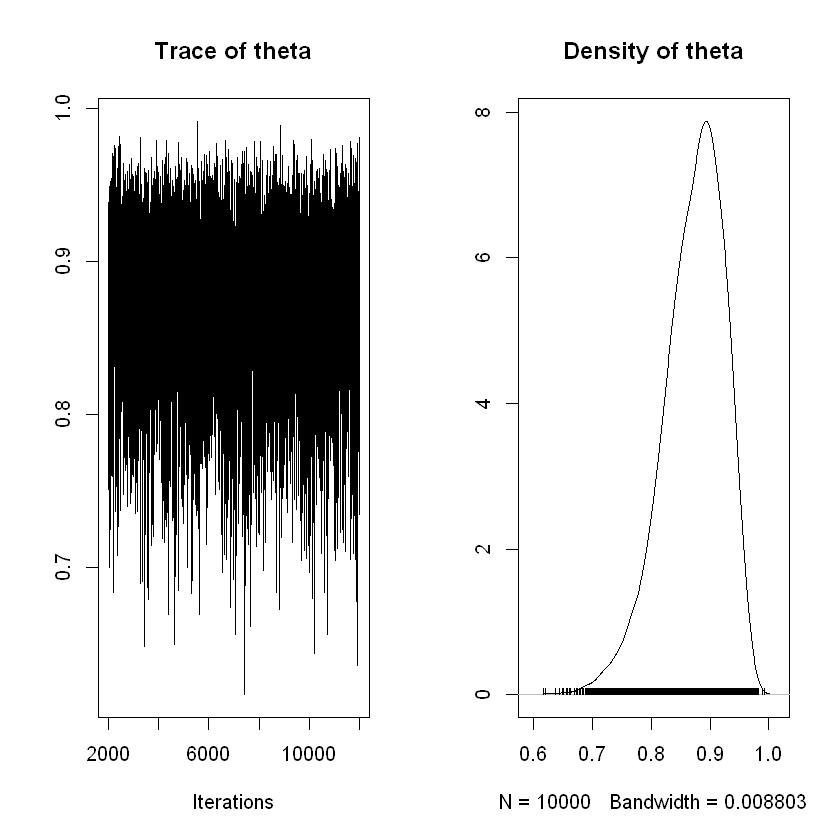

In [5]:
plot(posterior_sample)

### Acceptance-Reject sampling

### Metropolis-Hastings with IG(a,b)

### Metropolis-Hastings with Chi